# Project: Investigate a Dataset (FBI Gun Data)

## Table of content
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will be investigating a 19 year data set from the FBI's National Instant Criminal Background Check System (NICS) spanning from 1998 to 2017. The NICS system is used to determine the eligibility of a person to purchase firearms in the US based on their criminal records. I will also use the U.S census data to retrieve more insights on demographics of the gun Data.

##### For sake of clarity, here are some terms we would find in the data and their meanings as given by NICS.
1. __PrePawn__: background checks requested by an officially-licensed Federal Firearms Licensee (FFL) on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm.


2. __Redemption__: background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop.


3. __Returned__: background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited.


4. __Rentals__: background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.


5. __Private Sale__: background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.


6. __Return to Seller__: background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

In my analyis, i will try to extract the following information from the dataset;

1. Which state has the highest and least number of firearm checks Respectively 
2. which year recorded the highest number of firearm checks
3. What type of firearms were registered the most
4. what is the national average on total background checks
5. how many states are above and below the national average


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_theme(style="dark")

<a id='wrangling'></a>
#### Data Wrangling

In [2]:
# I'll start working with the NICS data to answer the first set of questions.
NICS_df = pd.read_excel(r'gun_data.xls')
NICS_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


#### General properties

In [3]:
#here i'll identify if there are duplicate or missing data that would affect
#my analysis. 
NICS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [4]:
NICS_df.duplicated().sum()

0

In [5]:
#getting the unique values in each column will give me perspective on the variables i'm working with
NICS_df.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

#### Data cleaning

From examining the data, i can see there are no duplicate values and the missing values are by my estimation a case of no corresponding activity in those variables, hence has no impact in my analysis.

I can also tell from using nunique that the dataframe consists of data from 50 U.S states and its other 5 territories along with 227 months of data for each state.

The columns are divided into 7 different types of background check transactions.(Refer to intro section...)

<a id='eda'></a>
## Exploratory Data Analysis

### Pre-Analysis
before answering the question posed at the begining of our anlysis, i will be showing only the histogram for first time permits and gun purchases. This is because other transaction types follow the same trend.

I will also define a `function` for all the `hist` plots in the analysis to avoid repetitive codes.
(_this is part of the review comment_.)

In [6]:
def histogram(data):
    data.plot(kind='hist', edgecolor = 'black');

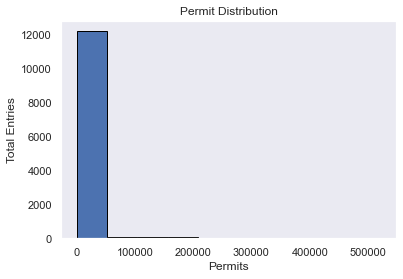

In [7]:
histogram(NICS_df['permit'])
plt.title('Permit Distribution')
plt.xlabel('Permits')
plt.ylabel('Total Entries')
plt.show()

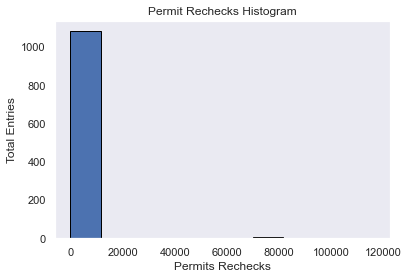

In [8]:
histogram(NICS_df['permit_recheck'])
plt.title('Permit Rechecks Histogram')
plt.xlabel('Permits Rechecks')
plt.ylabel('Total Entries')
plt.show()

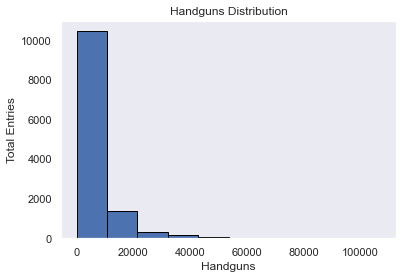

In [9]:
histogram(NICS_df['handgun'])
plt.title('Handguns Distribution')
plt.xlabel('Handguns')
plt.ylabel('Total Entries')
plt.show()

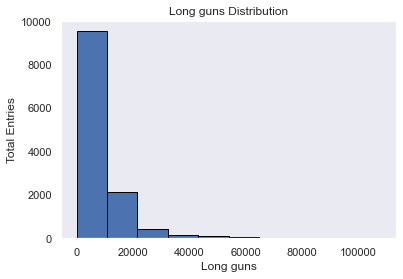

In [10]:
histogram(NICS_df['long_gun'])
plt.title('Long guns Distribution')
plt.xlabel('Long guns')
plt.ylabel('Total Entries')
plt.show()

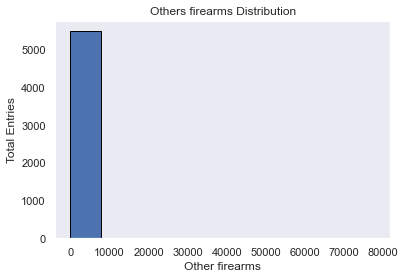

In [11]:
histogram(NICS_df['other'])
plt.title('Others firearms Distribution')
plt.xlabel('Other firearms')
plt.ylabel('Total Entries')
plt.show()

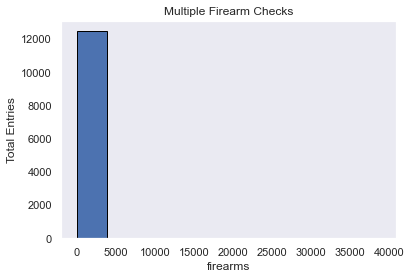

In [12]:
histogram(NICS_df['multiple'])
plt.title('Multiple Firearm Checks')
plt.xlabel('firearms')
plt.ylabel('Total Entries')
plt.show()

<div class="alert-success">
    <h4>General Histogram Findings:</h4>
    
    
From the chart, majority of background checks are within the first range of distribution. like permits, handguns and long guns. The remaining seem to have a single range.
    
As mentioned previously, the histogram only analyzes first time purchases, but the rest types of transaction mirrors the result of this analysis.
    </div>

## Research Question 1
##### Which state has the highest and least number of firearm checks Respectively ?

To answer this, i will use the totals column and sum all background check for each unique state. I opted to use a chart as it easily indicates the answer to my question.


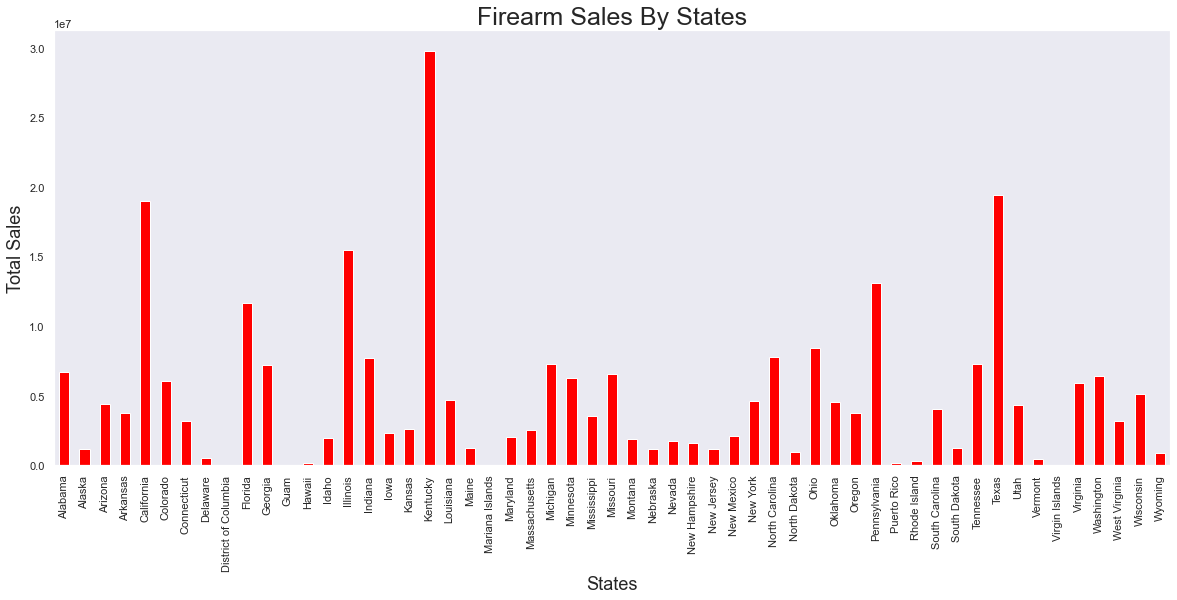

In [13]:
NICS_df.groupby('state')['totals'].sum().plot(x='state', y='totals', kind='bar',color=('red'), figsize= (20,8));
plt.title('Firearm Sales By States', fontsize=25)
plt.xlabel('States',fontsize=18)
plt.ylabel('Total Sales',fontsize=18)
plt.show()



In [14]:
#we can know the excat number using sum fuction for the hieghest and lowest totals with groupby.
NICS_df.groupby('state')['totals'].sum().max(), NICS_df.groupby('state')['totals'].sum().min()

(29762434, 462)

<div class="alert-success">
<H3>Answer 1</H3>
Kentuckey and Marianna Islands has the most and least number checks at <strong>29,762,434 and 462</strong> respectively.
</div>

## Research Question 2
##### which year recorded the highest number of firearm checks?

<div class="alert-danger">
<b><i>NB:</i></b><br/>
It's was very important that i changed the data type for the 'month' column because It would continue to give an incorrect plot until assigned accurate data type.
</div>

In [15]:
NICS_df['month'] = pd.to_datetime(NICS_df['month'])

Because of the variable and date span being investigated, i felt that scatter plot would be the best for visualizing this question.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


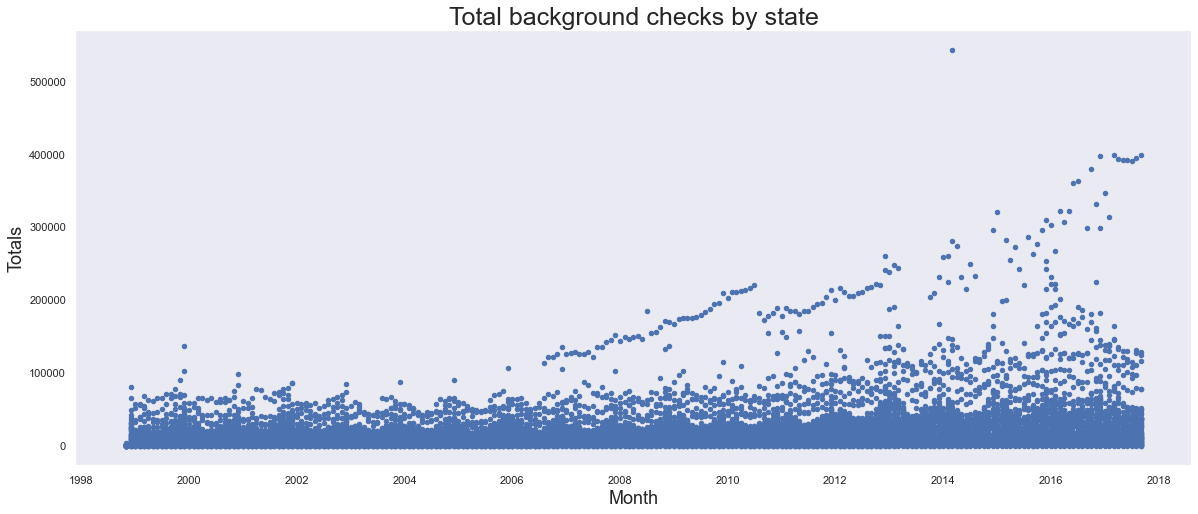

In [16]:
NICS_df.plot(x='month', y= 'totals', kind='scatter', figsize= (20,8));
plt.title('Total background checks by state', fontsize=25)
plt.xlabel('Month',fontsize=18)
plt.ylabel('Totals',fontsize=18)
plt.show()

<div class="alert-success">
This plot did not only answer the posed question of record highest year of checks, it also showed the general trend of gun purchase within the timeframe of the dataframe I'm working on.

### Answer 2
1. 2017 has record for the highest number of background checks on firearm purchases.


2. I can also see that there has been a steady increase in fire arm purchases in the last 19 years of the dataframe.
    </div>

## Research Question 3
##### Which type of firearms were registered the most ?

In [17]:
NICS_df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


<div class="alert-success">
The table above gives an automatically calculated summary for the columns. To answer the research question, pay attention to <b>mean</b> and <b>max</b> rows, as they give the numeric values that answers the research question.
<h3>Answer 3</h3>
1. Its clear from the summary table that __Long_guns__ are the most purchased firearms in the US accross all the transaction types ahead of handguns.


2. I can further extract that most of the purchases are new and direct from FFL stores.
    </div>

## Research Question 4
##### what is the national average on total background checks ?


In [18]:
national_average = round(NICS_df.mean().totals)
national_average

/Users/uchennaokolo/anaconda3/envs/Juno_Lee/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


21596

<div class="alert-success">
    <h3>Answer 4</h3>
National average on total gun purchases background check is approximately <b>= 21,596</b><br/>
    This was calaculated using the <b><em>.mean( )</em></b> function.
    
    
    
Finding the national average will aid in finding states where the citizens are most likely to purchase a firearm. This conclusion will only be based on the number of purchases made and doesn't assume the impact of other possible causations.
    </div>

## Research Question 5
##### how many states are above and below the national average of total gun background checks ?


i already have the national_average, so i would be creating two sets of dataframes from states average and refrence national_average as a break point between above and below national averages.

## States Average

calculating average for each state.

In [19]:
states_avg = NICS_df.groupby('state').mean().totals

To work with the states average, I have to convert it to a dataframe

In [20]:
states_avg=states_avg.to_frame()
states_avg.head()

,totals
state,
Alabama,29542.198238
Alaska,5011.643172
Arizona,19496.537445
Arkansas,16531.422907
California,83762.392070


Index will help me when using pandas query, hence; 

In [21]:
states_avg= states_avg.reset_index()
states_avg.head()

,state,totals
0,Alabama,29542.198238
1,Alaska,5011.643172
2,Arizona,19496.537445
3,Arkansas,16531.422907
4,California,83762.392070


I would like to rename columns for proper identification.

In [22]:
column_names = ['States', 'Average_check']
states_avg.columns = column_names
states_avg.head()

,States,Average_check
0,Alabama,29542.198238
1,Alaska,5011.643172
2,Arizona,19496.537445
3,Arkansas,16531.422907
4,California,83762.392070


### Creating Above Average and Below Average Data frames
using pandas query, create two dataframe for above and below national average.

create an array containing 'above' for above national average and 'below' for below national average.

This process will help my visualization when ploting.

In [23]:
above_avg = states_avg.query('Average_check >= {}'.format(national_average))
above_avg = above_avg.reset_index()
del above_avg['index']
above_avg.shape[0]

19

<div class="alert-success">
    <p>This answers the first part of our question. There are <b>19 states</b> above the nattional average</p>
    </div>

In [24]:
below_avg = states_avg.query('Average_check < {}'.format(national_average))
below_avg = below_avg.reset_index()
del below_avg['index']
below_avg.shape[0]

36

In [25]:
below_avg.head(2)

,States,Average_check
0,Alaska,5011.643172
1,Arizona,19496.537445


<div class="alert-success">
    <p>This answers the second part of the question. There are <b>36 states</b> above the nattional average</p>
    </div>

### Merge the Above Average and Below Average
To visualize our result on the last question, decided to merge these that dataaframes to gain a comparative insight. before merging them, i will be adding a new column to identify which side of national average they belong to (i.e above or below).

Numpy came in useful here.

Create an array that will be passed into the new column.

In [26]:
above_tag = np.repeat('above', above_avg.shape[0])
below_tag = np.repeat('below', below_avg.shape[0])

Add new column and confirm

In [27]:
above_avg['National_avg_rank']= above_tag
below_avg['National_avg_rank']= below_tag
above_avg.head(2)

,States,Average_check,National_avg_rank
0,Alabama,29542.198238,above
1,California,83762.392070,above


In [28]:
below_avg.head(2)

,States,Average_check,National_avg_rank
0,Alaska,5011.643172,below
1,Arizona,19496.537445,below


Combine the `above_avg` and `below_avg` data frames and then plot with it.

In [29]:
states_avg_new = above_avg.append(below_avg)

In [30]:
states_avg_new = states_avg_new.reset_index()
del states_avg_new['index']
states_avg_new.head(3)

,States,Average_check,National_avg_rank
0,Alabama,29542.198238,above
1,California,83762.392070,above
2,Colorado,26689.348018,above


I will be ploting a histogram to a general view of the distribution.

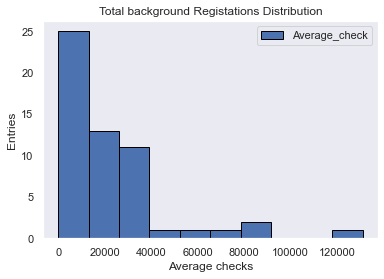

In [31]:
histogram(states_avg_new)
plt.title('Total background Registations Distribution')
plt.xlabel('Average checks')
plt.ylabel('Entries')
plt.show()

<div class="alert-success">
    <p>The plot clearly displays the divide between the states with higher averages and those with lower averages. A bar chart will give more specific details about these states.</p>
    </div>

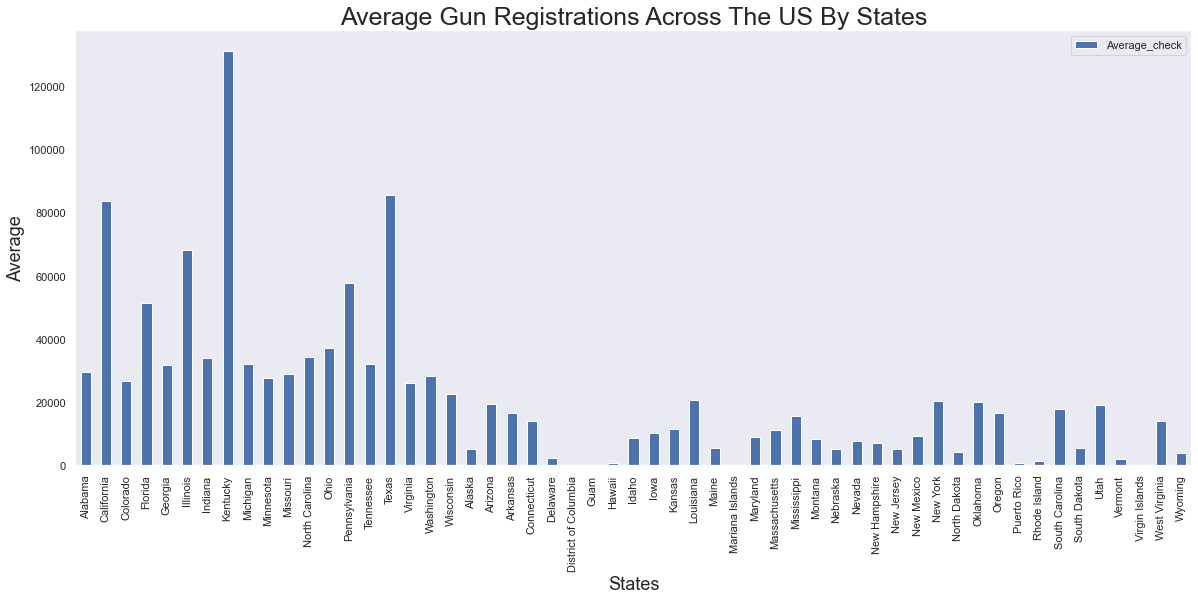

In [32]:
states_avg_new.plot(x='States', y= 'Average_check', kind='bar', figsize= (20,8));
plt.title('Average Gun Registrations Across The US By States', fontsize=25)
plt.xlabel('States',fontsize=18)
plt.ylabel('Average',fontsize=18)
plt.show()

<div class="alert-success">
<p>From the bar chart;</p>
    <ul>
        <li>Alabama to Wisconsin make up the above national average states. This is just a visualized confirmation of what we have already seen in the <b>above_avg</b> dataframe.
        </li><br/>
        <li>Similarly Alaska to Wyoming make up the below national average states. This is also just a visualized confirmation of what we have already seen in the <b>below_avg</b> dataframe.
        </li>
    </ul>
    </div>

In [33]:
states_avg_new.groupby('National_avg_rank')['Average_check'].sum()

National_avg_rank
above    868959.277533
below    318805.647577
Name: Average_check, dtype: float64

In [34]:
colors = ['#3120E0', '#FFE898']

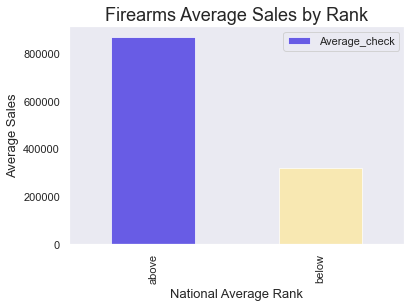

In [35]:
states_avg_new.groupby('National_avg_rank')['Average_check'].sum().plot(kind='bar', color=colors, alpha=.7);
plt.title('Firearms Average Sales by Rank', fontsize=18)
plt.xlabel('National Average Rank', fontsize= 13)
plt.ylabel('Average Sales', fontsize= 13)
plt.legend()
plt.show()

In [36]:
above_percentage= round(((above_avg['Average_check'].sum())/(states_avg['Average_check'].sum()))*100)
above_percentage

73

<div class="alert-success">
    <h3>Answer 5</h3>
From my analysis, there are 19 states average above the national average with kentucky topping the list.
The remaining 36 states make up the below average list, with Mariana Island having the least checks.

I also wanted to find the percentage share of states above avegrage on total gun background checks.
    <h4>The 19 states above the national average significantly make up more than half of all gun sales in the US recording <b>73%</b> of total sales</h4>
    </div>

<a id='conclusions'></a>
## Conclusions

From my analysis;
1. kentucky has the busiest gun sales in the country while Mariana Islands records the least of this activity.


2. The states nineteen states with state average for total gun background checks make up 73 percent of total gun purchaces in the US.

3. The overall trend of gun purchase in the US has continuously increased in within the timeframe provided in the data.

4. handguns and long-guns make up the majority of gun sales.

#### It's important to note that i did no causation analysis, hence this analysis are only observations from data provided.

#### I wasn't able to link any correlation between the NICS dataframe and the Census dataframe.



## References
1. [stackoverflow](https://stackoverflow.com/) `https://stackoverflow.com/`.
2. [Panadas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) `https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html`
3. [MachineLearningPlus](https://www.machinelearningplus.com/pandas/pandas-reset-index/#:~:text=To%20reset%20the%20index%20in,()%20with%20the%20dataframe%20object.&text=On%20applying%20the%20.,dataframe%20as%20a%20separate%20column.)

__NB__
*I refered to these sites to further learn how to write the code for my concepts.*